In [2]:
!ls -lh ../data

total 33M
-rwxr-xr-x 1 aliman aliman 147K Dec 13  2018 ag1000g.phase1.AR3.1.haplotypes.meta.txt
-rw-r--r-- 1 aliman aliman 2.6M May  9  2018 Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.4.gff3.gz
-rw-r--r-- 1 aliman aliman 7.4K Dec 13  2018 core_haps.pkl
-rw-r--r-- 1 aliman aliman  47K May  9  2018 davies_vgsc_model_20170125.gff3
-rw-r--r-- 1 aliman aliman  19K May  9  2018 domestica_gambiae_map.txt
-rw-r--r-- 1 aliman aliman 4.3K May  9  2018 domestica_gambiae_PROT_MEGA.fas
-rw-r--r-- 1 aliman aliman 4.2K May  9  2018 domestica_gambiae_PROT_MEGA.fas.flat
-rw-r--r-- 1 aliman aliman   66 May  9  2018 domestica_gambiae_PROT_MEGA.fas.gdx
-rw-r--r-- 1 aliman aliman  12M May  9  2018 haps_phase1.npz
-rw-r--r-- 1 aliman aliman 3.1K Dec 13  2018 hierarchical_cluster_membership.npy
-rw-r--r-- 1 aliman aliman  13K Dec 13  2018 median_joining_network_membership.npy
-rw-r--r-- 1 aliman aliman  894 May  9  2018 phasing_extra_phase1.mvncall.100.npz
-rw-r--r-- 1 aliman aliman  48K May  9  2018 phasing

In [3]:
!head ../data/supp_table_haplotype_panel.csv

haplotype_id,sample_id,population,country,region,sex,core_haplotype,network_haplotype_group,hierarchy_haplotype_group
AB0085-Ca,AB0085-C,BFS,Burkina Faso,Pala,F,F1,F1,F1
AB0085-Cb,AB0085-C,BFS,Burkina Faso,Pala,F,F1,F1,F1
AB0087-Ca,AB0087-C,BFM,Burkina Faso,Bana,F,L1,L1,
AB0087-Cb,AB0087-C,BFM,Burkina Faso,Bana,F,F1,F1,F1
AB0088-Ca,AB0088-C,BFM,Burkina Faso,Bana,F,F1,F1,F1
AB0088-Cb,AB0088-C,BFM,Burkina Faso,Bana,F,F1,F1,F1
AB0089-Ca,AB0089-C,BFM,Burkina Faso,Bana,F,F1,F1,F1
AB0089-Cb,AB0089-C,BFM,Burkina Faso,Bana,F,F1,F1,F1
AB0090-Ca,AB0090-C,BFM,Burkina Faso,Bana,F,F1,F1,F1


In [4]:
import pandas as pd

In [5]:
df_haps = pd.read_csv('../data/supp_table_haplotype_panel.csv')
df_haps.head()

,haplotype_id,sample_id,population,country,region,sex,core_haplotype,network_haplotype_group,hierarchy_haplotype_group
0,AB0085-Ca,AB0085-C,BFS,Burkina Faso,Pala,F,F1,F1,F1
1,AB0085-Cb,AB0085-C,BFS,Burkina Faso,Pala,F,F1,F1,F1
2,AB0087-Ca,AB0087-C,BFM,Burkina Faso,Bana,F,L1,L1,NaN
3,AB0087-Cb,AB0087-C,BFM,Burkina Faso,Bana,F,F1,F1,F1
4,AB0088-Ca,AB0088-C,BFM,Burkina Faso,Bana,F,F1,F1,F1


In [12]:
len(df_haps[df_haps.hierarchy_haplotype_group.str.startswith('F', na=False)])

743

In [22]:
len(df_haps[df_haps.core_haplotype.str.startswith('F', na=False)])

775

In [23]:
743 / 775

0.9587096774193549

In [24]:
len(df_haps[df_haps.hierarchy_haplotype_group.str.startswith('S', na=False)])

425

In [25]:
len(df_haps[df_haps.core_haplotype.str.startswith('S', na=False)])

430

In [26]:
425 / 430

0.9883720930232558

In [7]:
df_haps.hierarchy_haplotype_group.value_counts()

F1    453
F5    196
S3    165
S1    108
S2     79
F4     42
F3     38
S4     37
S5     36
F2     14
Name: hierarchy_haplotype_group, dtype: int64

In [6]:
df_haps.core_haplotype.value_counts()

F1      468
F5      188
S3      153
S1      108
S2       79
F3       51
WT01     48
WT02     38
WT03     37
S4       37
F4       36
S5       36
WT04     22
WT05     20
L1       20
L2       16
F2       14
SX01     12
WT06     10
WT08      8
WT07      8
WT09      7
WT10      6
WT11      6
WT13      4
WT12      4
WT14      4
WT15      3
WT16      3
WT17      3
       ... 
WT46      1
WT36      1
WT48      1
WT37      1
WT35      1
FX05      1
WT38      1
FX03      1
WT47      1
WT50      1
FX06      1
WT44      1
FX10      1
WT58      1
FX13      1
WT56      1
FX09      1
FX02      1
FX08      1
WT41      1
WT54      1
SX04      1
WT39      1
WT40      1
WT51      1
WT49      1
FX07      1
FX15      1
FX12      1
FX14      1
Name: core_haplotype, Length: 91, dtype: int64

In [51]:
%run setup.ipynb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import hapclust

from scipy.cluster.hierarchy import _convert_to_double
from scipy.spatial import distance
from scipy.cluster.hierarchy import _hierarchy

In [39]:
region_vgsc = '2L', 2358158, 2431617

In [156]:
def load_data(chrom, start=None, stop=None, n_variants=None):
    
    # load data
    callset_haps = np.load('../data/haps_phase1.npz')
    haps = allel.HaplotypeArray(callset_haps['haplotypes'])
    pos = allel.SortedIndex(callset_haps['POS'])
    ann = callset_haps['ANN']

    
    # locate the region of interest
    if start and stop:
        loc = pos.locate_range(start, stop)
    elif start and n_variants:
        start_idx = bisect.bisect_left(pos, start)
        stop_idx = start_idx + n_variants
        loc = slice(start_idx, stop_idx)
    elif stop and n_variants:
        stop_idx = bisect.bisect_right(pos, stop)
        start_idx = stop_idx - n_variants
        loc = slice(start_idx, stop_idx)
    else:
        raise ValueError('bad args')
    
    # obtain haplotypes for the region of interest
    pos = pos[loc]
    h = haps[loc]
    
    #setup missense
    tbl_variants_selected = etl.frompickle('../data/tbl_variants_missense_selected.pkl')

    tbl_selected_redux = (
        tbl_variants_selected
        .cut('POS', 'REF', 'ALT', 'AGAP004707-RA')
        .mergeduplicates(key=('POS'))
        .convert('ALT', lambda v: ','.join(v) if len(v) > 1 else v)
        .addfield('label',  lambda rec: '%s:%s>%s %s' % (rec.POS, rec.REF, rec.ALT.ljust(3), rec['AGAP004707-RA'].rjust(6)))
        .sort('POS')
        .selectin('AGAP004707-RA', {'L995F', 'L995S'})
    )
    
    # extract positions for the missense variants
    pos_missense = allel.SortedIndex(tbl_selected_redux['POS'])
    
    # extract haplotypes for the missense variants
    missense_bool = np.in1d(pos, pos_missense)
    h_missense = h.compress(missense_bool)
    
    missense_mutations = list(tbl_selected_redux['AGAP004707-RA'])
    
    return pos, h, h_missense, missense_mutations

In [157]:
pos, h, h_missense, missense_mutations = load_data(*region_vgsc)

In [158]:
h.shape

(1713, 1530)

In [165]:
missense_mutations

['L995S', 'L995F']

In [170]:
def plot_missense_haplotypes(ax, h, mut_labels=missense_mutations):
    h = h.copy()
    # colours for colormap
    mycol = ['r', 'w', 'k'] 
    # alter rows with kdr mutations for color map to pick up
#     known_muts = ['L995S (2984T>C)', 'L995F (2985A>T)', 'N1570Y (4708A>T)']
    known_muts = ['L995S', 'L995F', 'N1570Y']
    for mut in known_muts:
        if mut in mut_labels:
            h[mut_labels.index(mut)] *= -1

    # make colormap
    cake = mpl.colors.ListedColormap(mycol, name='mymap', N=3)
    # plot
    ax.pcolormesh(np.asarray(h[::-1]), cmap=cake, vmin=-1, vmax=1, zorder=-10)
        
    ax.set_yticks(np.arange(h.shape[0])+.5)
    lbl = [l for l in mut_labels[::-1]]
#     lbl = ['%s' % l for l in mut_labels[::-1]]
    ax.set_yticklabels(lbl, family='monospace', fontsize=6)
    
    for ytick in ax.get_yticklabels():
        if ytick.get_text() in known_muts:
            ytick.set_color('r')
    
    ax.hlines(np.arange(h.shape[0]+1), 0, h.shape[1], color='k', lw=.5)
    ax.set_xlim(0, h.shape[1])
    ax.set_ylim(0, h.shape[0])
#     ax.set_xticks([])
    ax.yaxis.tick_left()
    ax.set_xticks([])
    # rasterize to avoid SVG antialiasing issues and reduce file size
    ax.set_rasterization_zorder(-5)
#     ax.set_xticks(list(range(0, h.shape[1], 200)) + [h.shape[1]])
#     ax.xaxis.tick_bottom()
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)

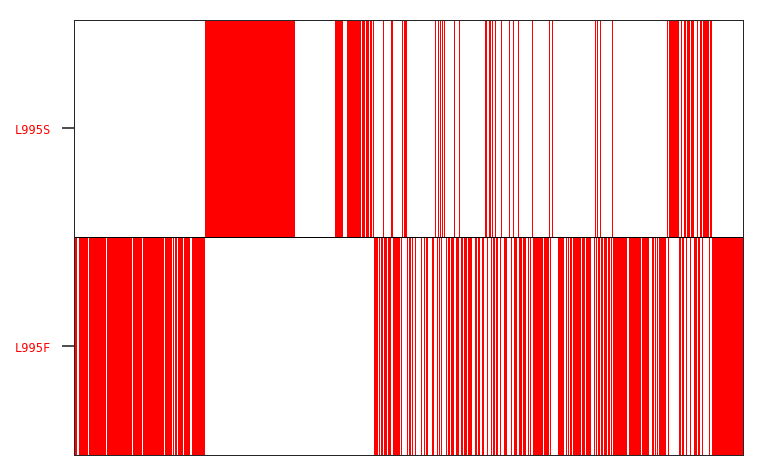

In [171]:
fig, ax = plt.subplots()
plot_missense_haplotypes(ax, h_missense)

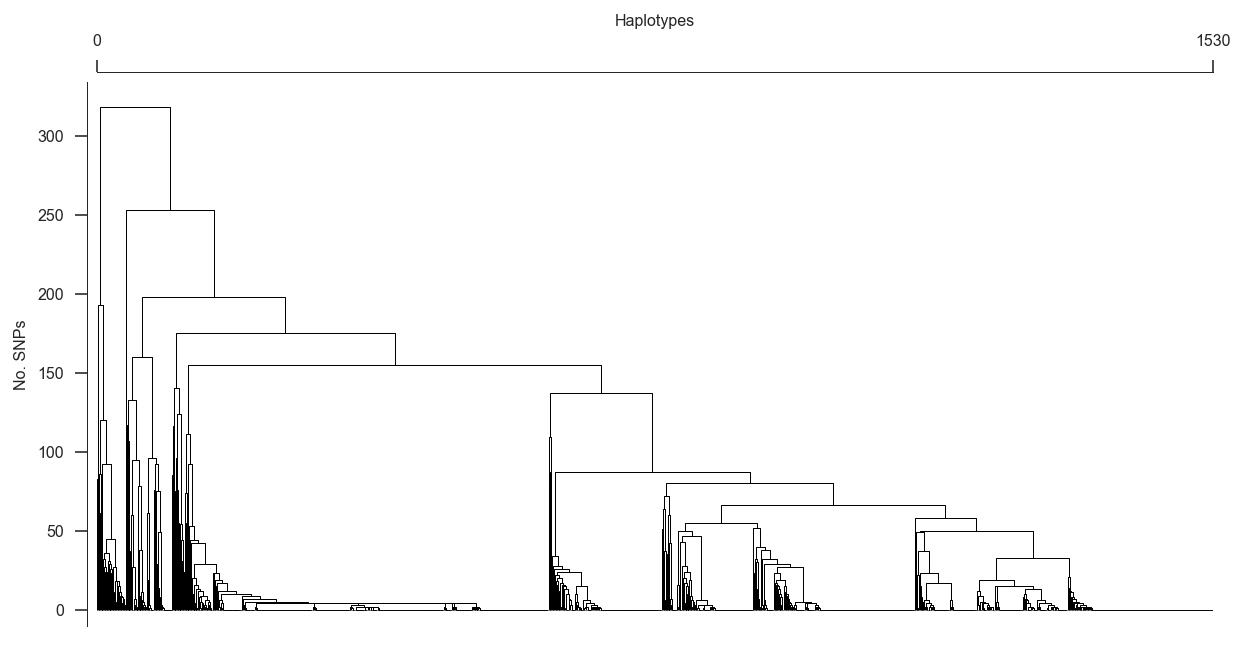

In [307]:
def plot_dendrogram(h, ax, method='complete', color_threshold=0, above_threshold_color='k',
                    max_dist=None):
    
    # compute distance matrix
    dist = allel.stats.pairwise_distance(h, 'hamming') * h.shape[0]

    # HACKING SCIPY TO GET TO OLD CLUSTERING METHOD
    # https://github.com/scipy/scipy/blob/v0.18.1/scipy/cluster/hierarchy.py#L470-L667
    # 1. fiddle with format
    y = _convert_to_double(np.asarray(dist, order='c'))
    # 2. get n
    n = int(distance.num_obs_y(dist))
    # 3. do clustering
    method = dict(single=0, complete=1)[method]
    z = _hierarchy.linkage(y, n, method)    

    # plot dendrogram
    sns.despine(ax=ax, offset=5, bottom=True, top=False)
    r = scipy.cluster.hierarchy.dendrogram(z, no_labels=True, count_sort=True, 
                                           color_threshold=color_threshold, 
                                           above_threshold_color=above_threshold_color,
                                           ax=ax)
    xmin, xmax = ax.xaxis.get_data_interval()
    xticklabels = np.array([0, h.shape[1]])
    xticks = xticklabels / h.shape[1]
    xticks = (xticks * (xmax - xmin)) + xmin
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('Haplotypes', va='top')
    ax.xaxis.set_label_position('top')
    ax.set_ylim(bottom=-10, top=max_dist)
#     ax.set_xlim(left=-10)
    ax.set_ylabel('No. SNPs')
    ax.autoscale(axis='x', tight=True)
    return z, r

fig, ax = plt.subplots(figsize=(10, 5))
z, r = plot_dendrogram(h, ax);

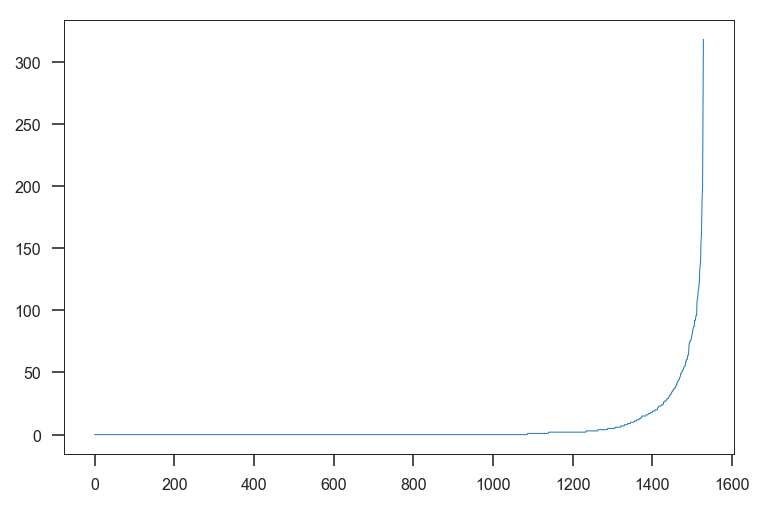

In [317]:
plt.plot(z[:, 2])

In [174]:
populations = phase1_ar3.pop_ids
pop_colours = phase1_ar3.pop_colors
pop_labels = phase1_ar3.pop_labels

In [45]:
df_haplotypes = phase1_ar31.df_haplotypes.query('population != "colony"')
df_haplotypes.head()

,label,ox_code,population,label_aug,country,region,sex,m_s,kt_2la,kt_2rb
index,,,,,,,,,,
0,AB0085-Ca,AB0085-C,BFS,"AB0085-Ca [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
1,AB0085-Cb,AB0085-C,BFS,"AB0085-Cb [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
2,AB0087-Ca,AB0087-C,BFM,"AB0087-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
3,AB0087-Cb,AB0087-C,BFM,"AB0087-Cb [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
4,AB0088-Ca,AB0088-C,BFM,"AB0088-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,0.0


In [48]:
import numpy as np

In [68]:
import seaborn as sns

None 58.0 42.0 72.0 0.0 318.0


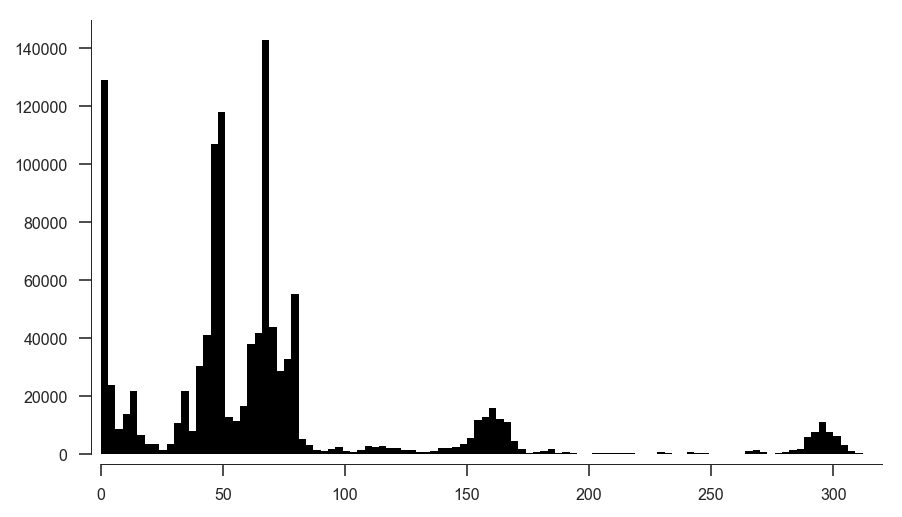

In [322]:
def plot_dist_hist(h, ax=None, pop=None, max_dist=320):

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 4))
        sns.despine(ax=ax, offset=5)
    
    color = 'k'
    if pop:
        hap_ix = df_haplotypes.query('population == "{}"'.format(pop)).index.values
        h = h.take(hap_ix, axis=1)
        color = pop_colours[pop]
    
    # compute distance matrix
    dist = allel.stats.pairwise_distance(h, 'hamming') * h.shape[0]
    print(pop, np.median(dist), np.percentile(dist, q=25), np.percentile(dist, q=75),
          np.min(dist), np.max(dist))
    
    ax.hist(dist, bins=np.arange(0, np.max(dist), 3), color=color)
    ax.set_xlim(0, max_dist)
    
plot_dist_hist(h)

In [323]:
df_haplotypes.population.value_counts()

CMS    550
UGS    206
BFS    162
BFM    138
AOM    120
GAS    112
GWA     92
KES     88
GNS     62
Name: population, dtype: int64

GWA 202.0 85.0 294.0 1.0 317.0


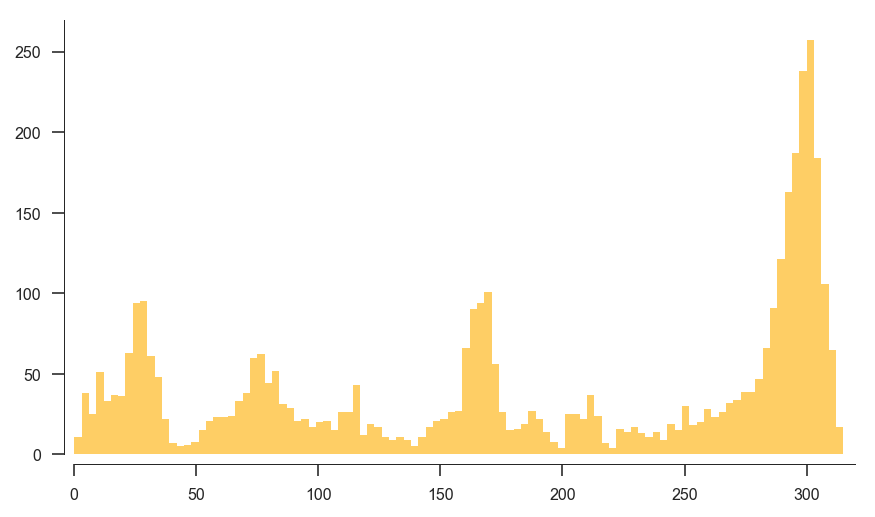

In [324]:
plot_dist_hist(h, pop='GWA')

BFS 2.0 2.0 3.0 0.0 7.0


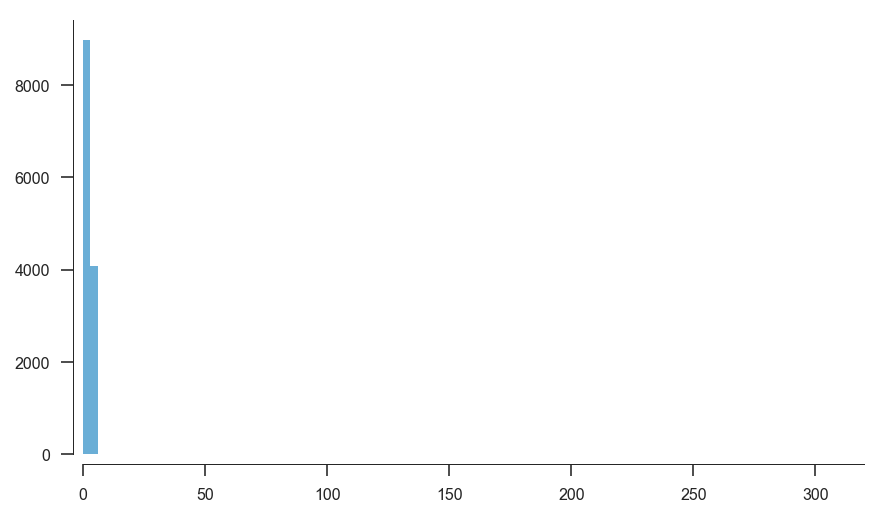

In [325]:
plot_dist_hist(h, pop='BFS')

UGS 72.0 0.0 76.0 0.0 81.0


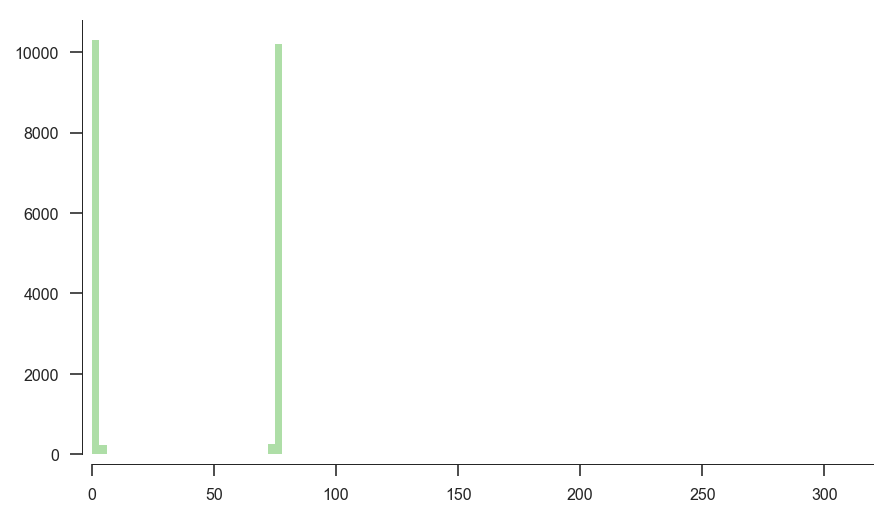

In [326]:
plot_dist_hist(h, pop='UGS')

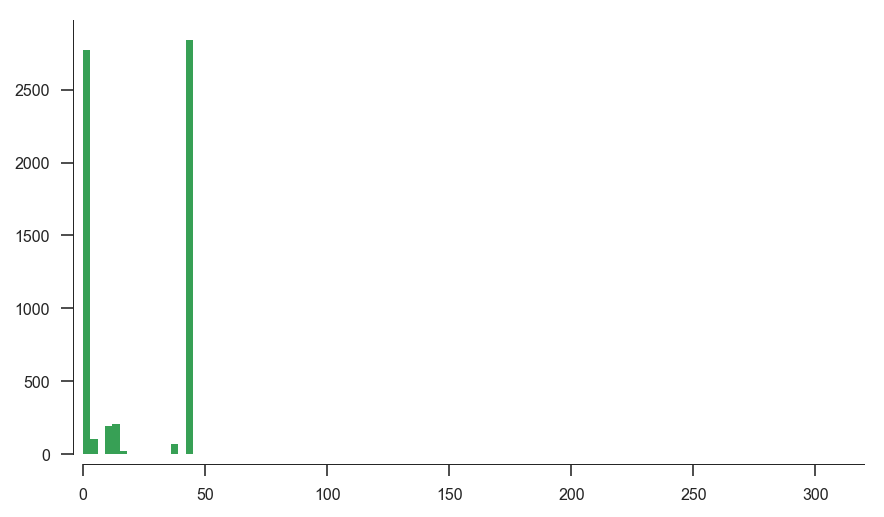

In [75]:
plot_dist_hist(h, pop='GAS')

In [193]:
x = allel.HaplotypeArray(h)
x

<HaplotypeArray shape=(1713, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [195]:
allel.haplotype_diversity(h)

0.96329524615601647

In [303]:
def fig_hap_structure(h, h_display=None, pop=None, figsize=(8, 2.5), 
                      fn=None, dpi=120, 
                      height_ratios=(10, 3), 
                      width_ratios=(1, 1),
                      legend=True, max_dist=320):
    
    # create the figure
    fig = plt.figure(figsize=figsize, facecolor='white', dpi=dpi)
    
    # define subplot layout
    gs_nrows = 2
    gs_ncols = 2
    gs = mpl.gridspec.GridSpec(gs_nrows, gs_ncols, hspace=0.04, wspace=0.04,
                               height_ratios=height_ratios,
                               width_ratios=width_ratios)

    # setup data
    if pop:
        hap_ix = df_haplotypes.query('population == "{}"'.format(pop)).index.values
        h = h.take(hap_ix, axis=1)
        if h_display is not None:
            h_display = h_display.take(hap_ix, axis=1)
        hap_pops = df_haplotypes.query('population == "{}"'.format(pop)).population.values
    else:
        hap_pops = df_haplotypes.population.values
        
    # dendrogram
    ax_dend = fig.add_subplot(gs[0, 0])
    z, r = plot_dendrogram(h, ax_dend, color_threshold=0, max_dist=max_dist)
    ax_dend.set_ylim(bottom=-5, top=max_dist)
    ax_dend.xaxis.set_tick_params(length=3, pad=2)
    ax_dend.yaxis.set_tick_params(length=3, pad=2)

#     # population colours
#     ax_pops = fig.add_subplot(gs[1, 0])
#     x = hap_pops.take(r['leaves'])
#     hap_clrs = [pop_colours[p] for p in x]
#     ax_pops.broken_barh(xranges=[(i, 1) for i in range(h.shape[1])], yrange=(0, 1), color=hap_clrs);
#     sns.despine(ax=ax_pops, offset=5, left=True, bottom=True)
#     ax_pops.set_xticks([])
#     ax_pops.set_yticks([])
#     ax_pops.set_xlim(0, h.shape[1])
#     ax_pops.yaxis.set_label_position('left')
#     ax_pops.set_ylabel('Population', rotation=0, ha='right', va='center')
    
    # missense mutations
    if h_display is not None:
        ax_mut = fig.add_subplot(gs[1, 0])
        plot_missense_haplotypes(ax_mut, h_display.take(r['leaves'], axis=1))
        ax_mut.set_xticks([])
        ax_mut.yaxis.set_tick_params(length=3, pad=2)

    # histogram
    ax_hist = fig.add_subplot(gs[0, 1])
    sns.despine(ax=ax_hist, offset=5, left=True, right=False)
    plot_dist_hist(h, ax=ax_hist, max_dist=max_dist)
    ax_hist.yaxis.tick_right()
    ax_hist.set_xlabel('No. SNPs')
    ax_hist.set_ylabel('Frequency')
    ax_hist.yaxis.set_label_position('right')

    if pop:
        txt = '{}'.format(pop_labels[pop])
        fig.suptitle('Population = {}'.format(pop_labels[pop]), y=1.1, ha='right', x=.9)
#         ax_hist.text(ax_hist.get_xlim()[1], ax_hist.get_ylim()[1], txt, ha='right', va='bottom')

    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight')
        
    return z, r

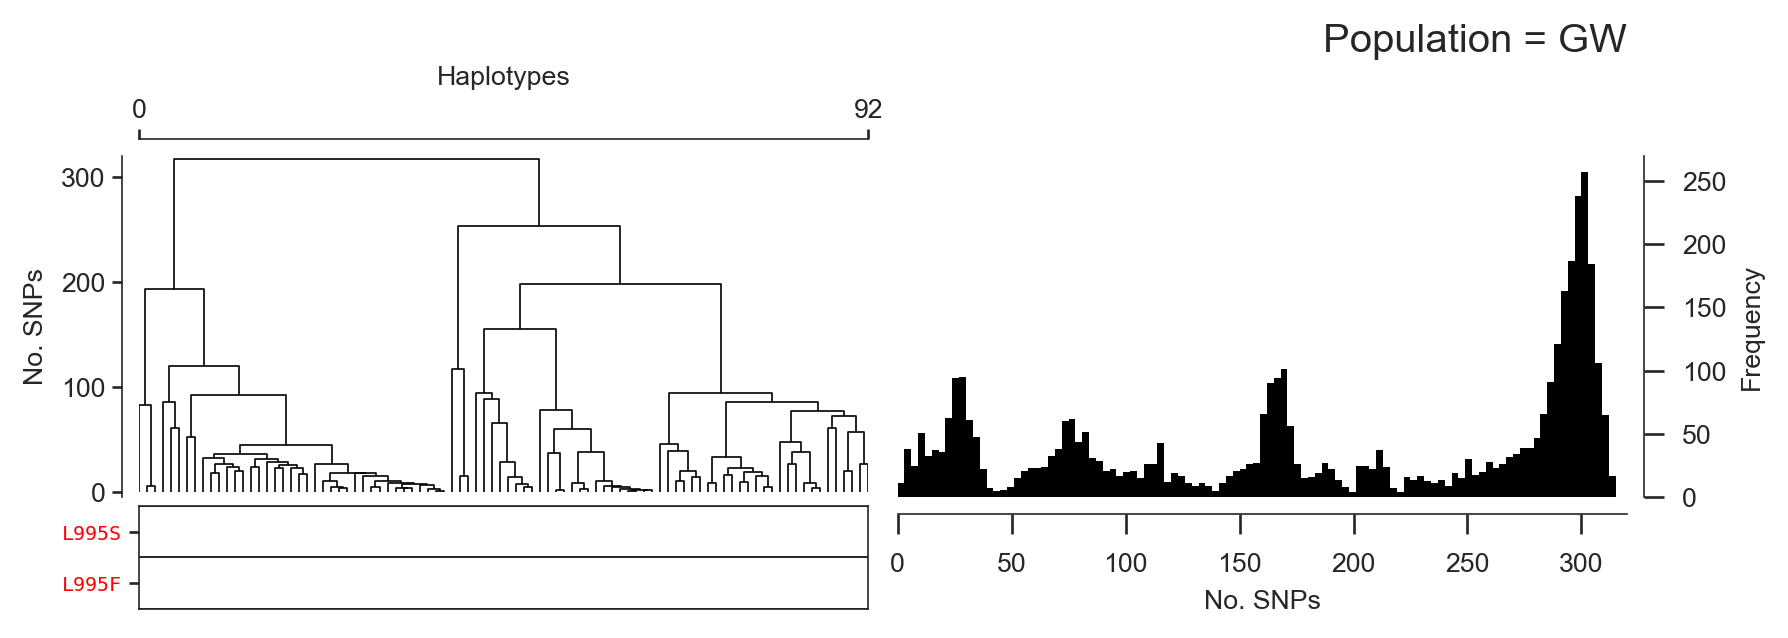

In [304]:
fig_hap_structure(h, h_missense, pop='GWA');

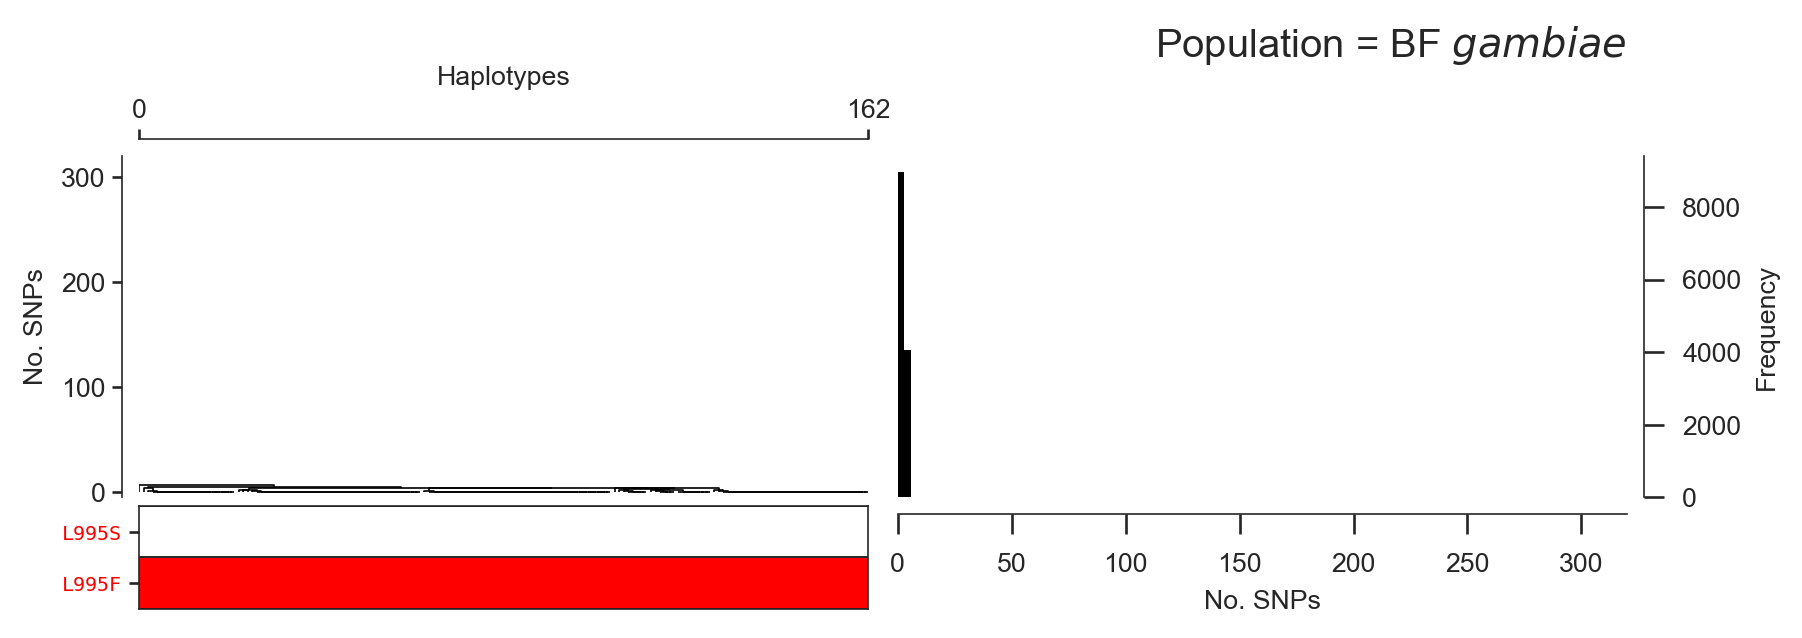

In [305]:
fig_hap_structure(h, h_missense, pop='BFS');

None 72.0 0.0 76.0 0.0 81.0


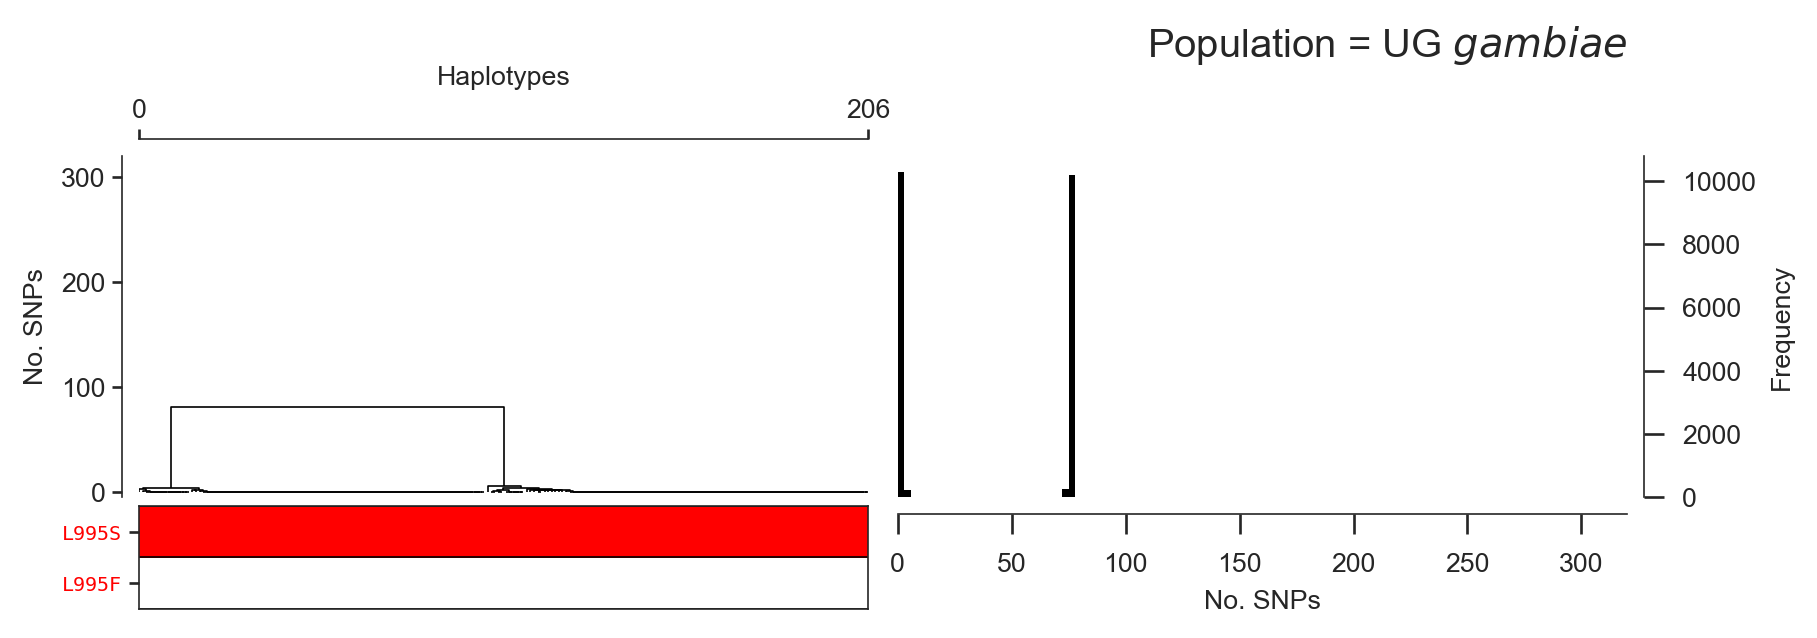

In [327]:
z, r = fig_hap_structure(h, h_missense, pop='UGS');

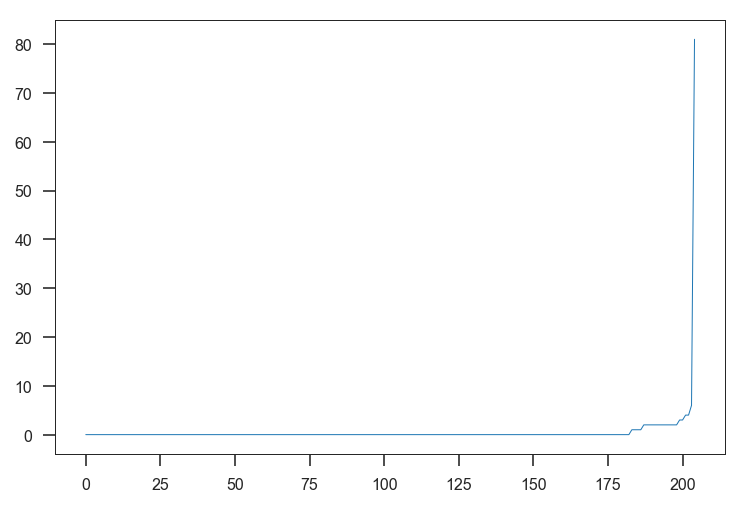

In [329]:
plt.plot(z[:, 2])

In [330]:
z[-10:, 2]

array([  2.,   2.,   2.,   2.,   3.,   3.,   4.,   4.,   6.,  81.])

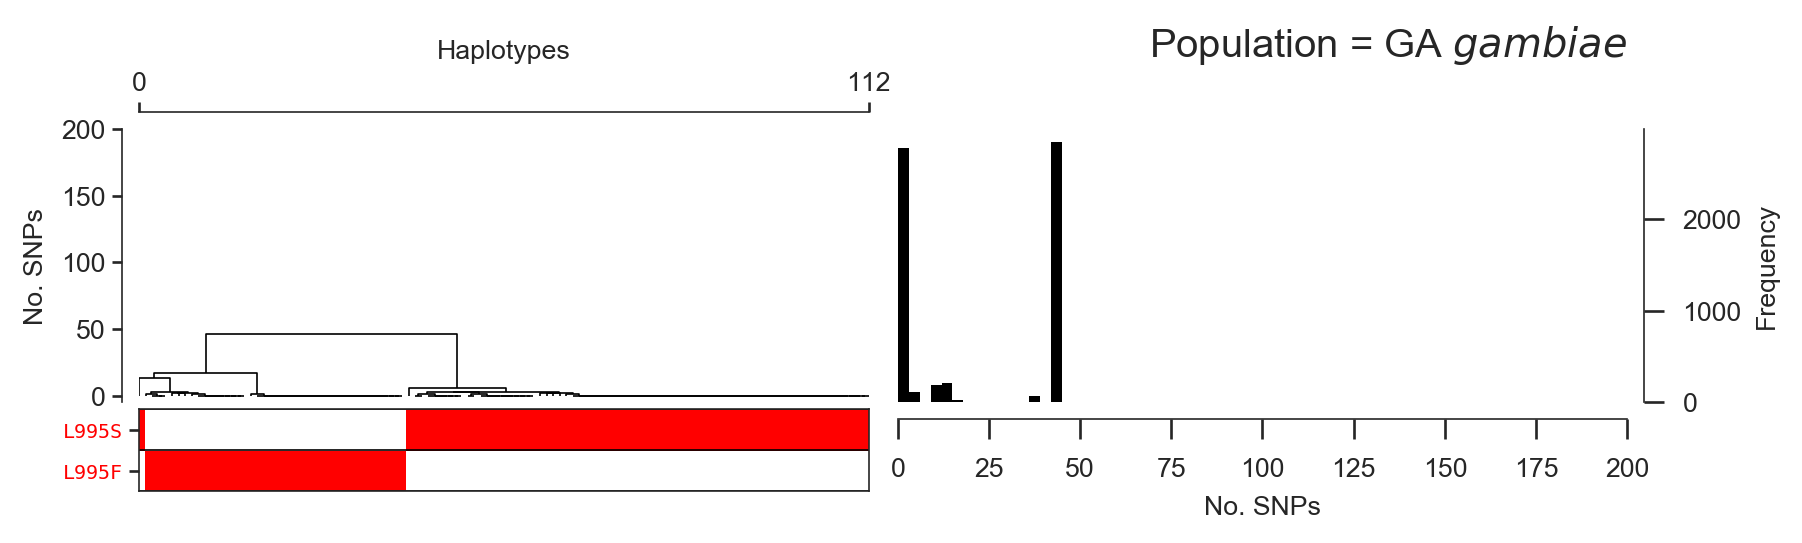

In [297]:
fig_hap_structure(h, h_missense, pop='GAS', max_dist=200);

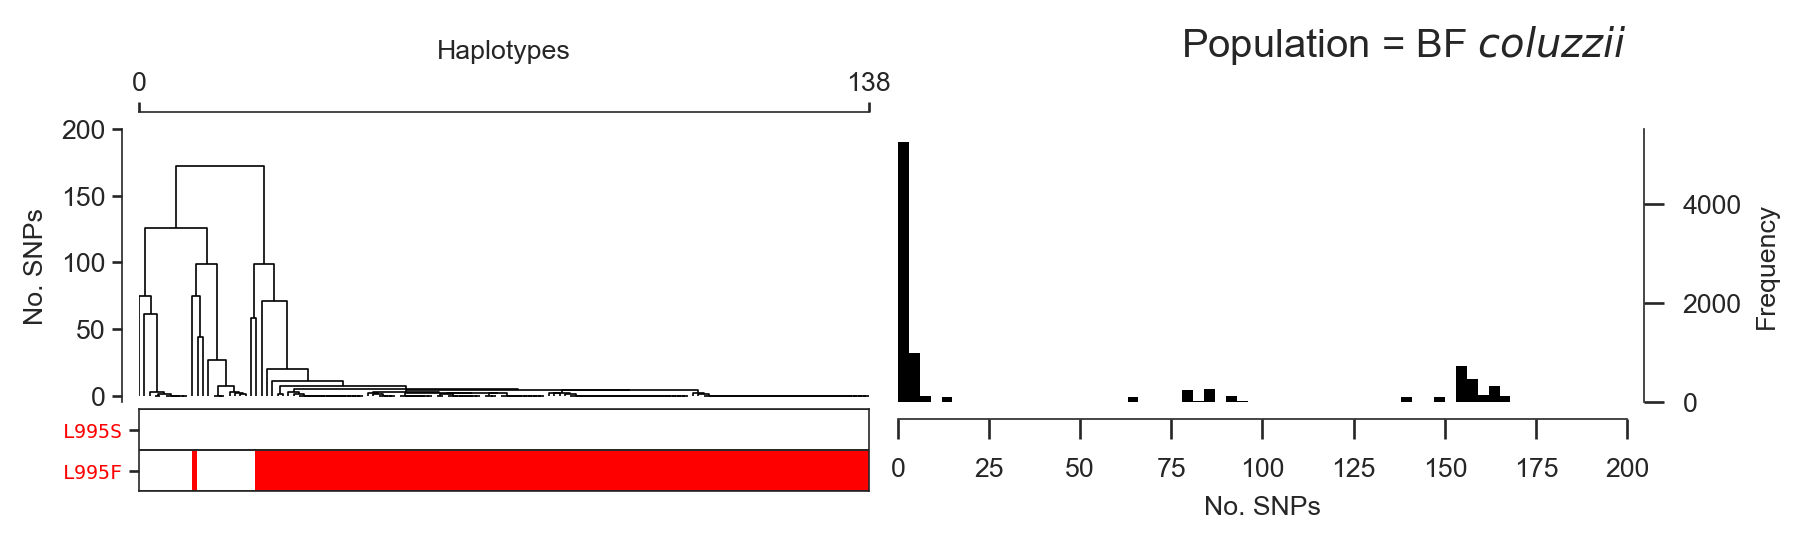

In [298]:
fig_hap_structure(h, h_missense, pop='BFM', max_dist=200);

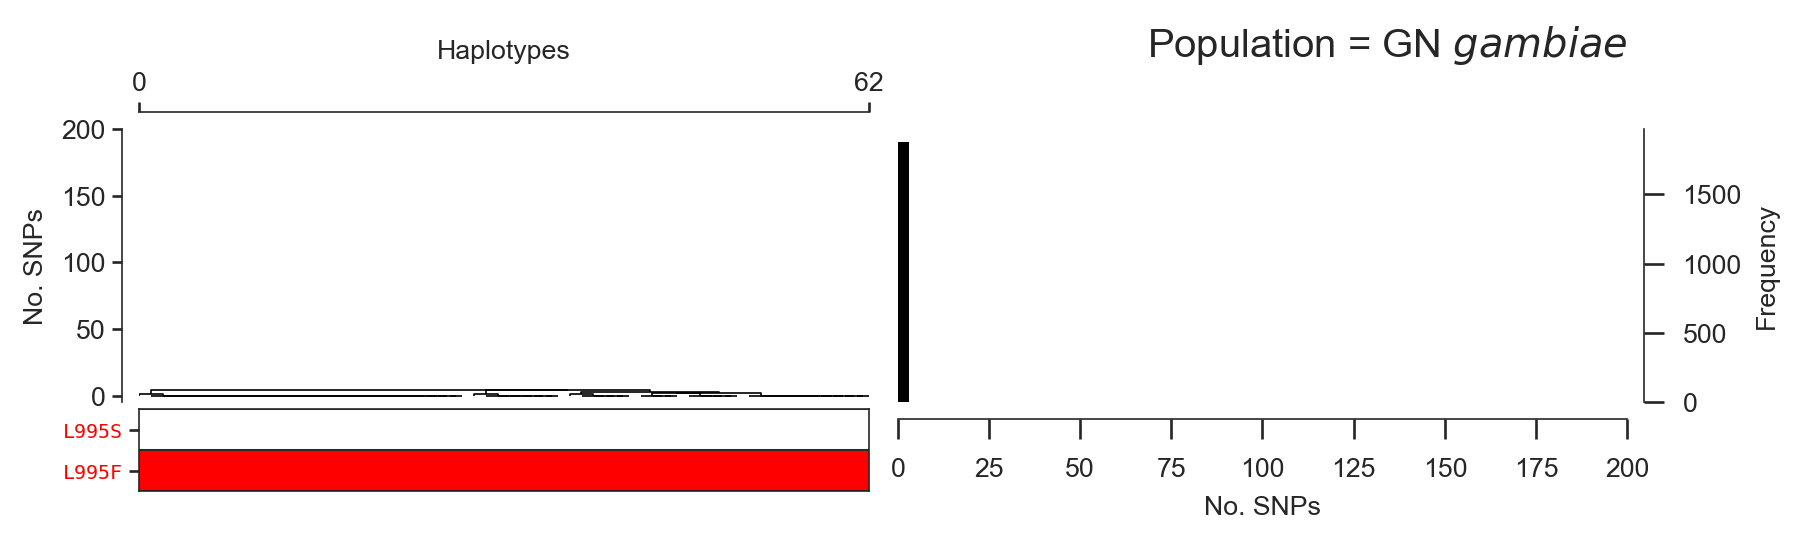

In [299]:
fig_hap_structure(h, h_missense, pop='GNS', max_dist=200);

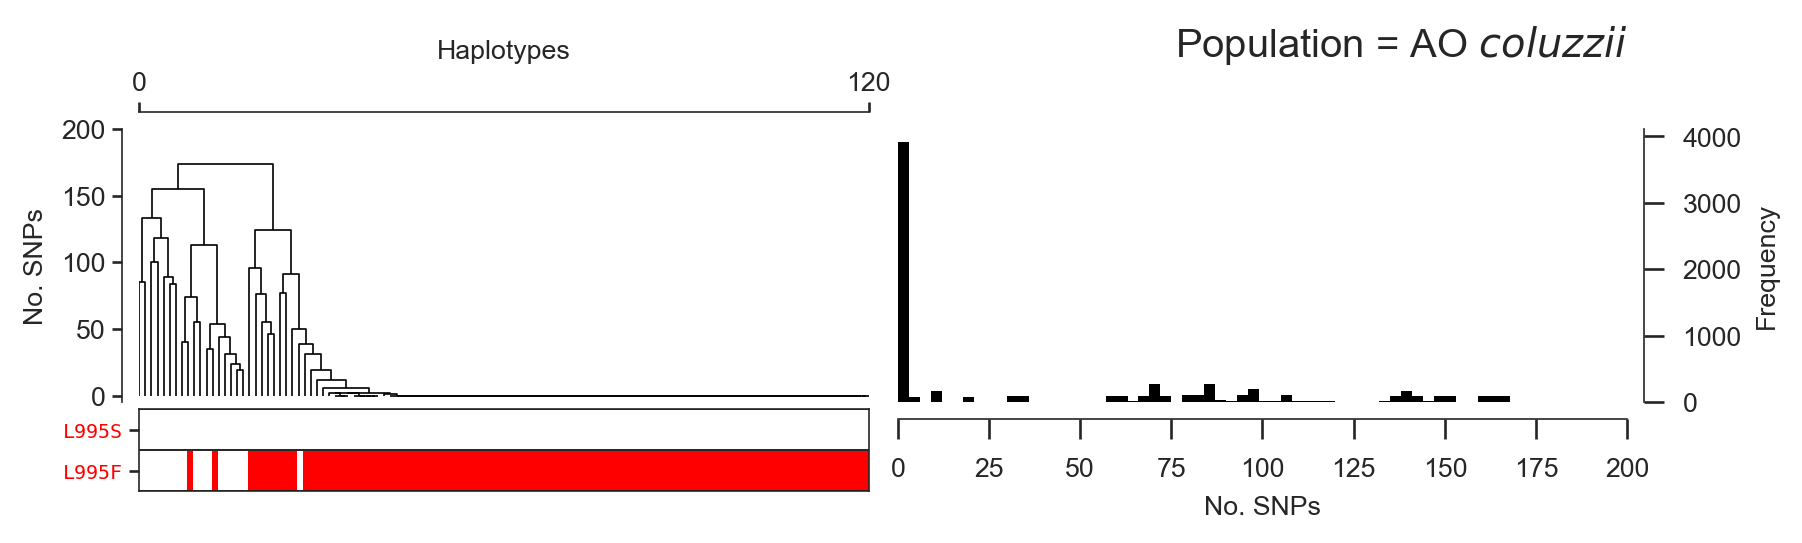

In [300]:
fig_hap_structure(h, h_missense, pop='AOM', max_dist=200);